In [ ]:
%cd /content
%pwd

'/content'

In [6]:
#드라이브 연동하고 다운받은데이터zip 경로
!unzip /content/drive/MyDrive/open.zip


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/syn_03981.png     
  inflating: train/syn_03981.txt     
  inflating: train/syn_03982.png     
  inflating: train/syn_03982.txt     
  inflating: train/syn_03983.png     
  inflating: train/syn_03983.txt     
  inflating: train/syn_03984.png     
  inflating: train/syn_03984.txt     
  inflating: train/syn_03985.png     
  inflating: train/syn_03985.txt     
  inflating: train/syn_03986.png     
  inflating: train/syn_03986.txt     
  inflating: train/syn_03987.png     
  inflating: train/syn_03987.txt     
  inflating: train/syn_03988.png     
  inflating: train/syn_03988.txt     
  inflating: train/syn_03989.png     
  inflating: train/syn_03989.txt     
  inflating: train/syn_03990.png     
  inflating: train/syn_03990.txt     
  inflating: train/syn_03991.png     
  inflating: train/syn_03991.txt     
  inflating: train/syn_03992.png     
  inflating: train/syn_03992.txt     
  inflating: train/syn_03993.png     
  inflating: t

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/train/

/content/train


In [8]:
import glob

In [9]:
#추가@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#train val split
import numpy as np
from tqdm import tqdm
import random
import os
import torch
import cv2
import matplotlib.pyplot as plt
import json
from PIL import Image

from torch.utils.data import Dataset, DataLoader, ConcatDataset
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import glob


#from mmcv import Config
# from archive.src.model.basemodel import build_model
# from archive.src.config.config import cfg, seed_everything
# from archive.src.train.training import train
# from archive.src.evaluation.evaluation import inference
# from archive.src.data.dataloader import DatasetLoader
# from archive.src.train.scheduler import CosineAnnealingWarmUpRestarts
%cd /content
!mkdir valid
%cd /content/train
# before dividing samples
total_image = sorted(glob.glob('./*.png'))
total_annotation = sorted(glob.glob('./*.txt'))
### check sampling validality
sampling_choice = random.sample(range(len(total_image)), 1000)
sampling_choice
len(np.unique(sampling_choice))

### check pairing validality
for i in range(len(total_image)):
  if total_image[i][2:11] != total_annotation[i][2:11]:
      print("Not paired!")

### check file name validality
for i in range(len(total_image)):
  if len(total_image[i]) != 15:
    print("different file name length!")

import random
import shutil


valid_size = 1000

sampling_choice = random.sample(range(len(total_image)), valid_size)
src = '/content/train/'
dst = '/content/valid/'
for choice in sampling_choice:
    chosen_image = total_image[choice]
    chosen_annotation = total_annotation[choice]
    shutil.move(src + chosen_image[2:], dst + chosen_image[2:])
    shutil.move(src + chosen_annotation[2:], dst + chosen_annotation[2:])

%cd /content

/content
/content/train
/content


In [10]:
train_anno = sorted(glob.glob('/content/train/*.txt'))

In [11]:
%cd /content/valid

/content/valid


In [12]:
valid_anno = sorted(glob.glob('/content/valid/*.txt'))

In [13]:
len(train_anno)

5481

In [14]:
len(valid_anno)

1000

In [15]:
%cd /content
!pwd
!mkdir coco_style
!mkdir coco_style_anno

/content
/content


In [16]:
%cd coco_style
!mkdir train2017
!mkdir val2017
!mkdir annotations

/content/coco_style


In [17]:
%cd /content
%cd coco_style_anno
!mkdir train2017
!mkdir val2017

/content
/content/coco_style_anno


In [18]:
%cd /content

/content


In [19]:
#추가@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#image , label 분리 train
import os
import shutil
%cd /content/train
!mkdir data
!mkdir label
# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/train'  # 원본 폴더의 경로로 설정하세요.
png_folder = './data'      # PNG 파일을 저장할 폴더 경로
txt_folder = './label'      # TXT 파일을 저장할 폴더 경로

# 대상 폴더가 없으면 생성
os.makedirs(png_folder, exist_ok=True)
os.makedirs(txt_folder, exist_ok=True)

# 원본 폴더 내의 모든 파일을 가져와서 분류
for filename in os.listdir(source_folder):
    if filename.endswith('.png'):
        # PNG 파일인 경우
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(png_folder, filename)
        shutil.move(source_path, target_path)
        print(f'Moved {filename} to {png_folder}')
    elif filename.endswith('.txt'):
        # TXT 파일인 경우
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(txt_folder, filename)
        shutil.move(source_path, target_path)
        print(f'Moved {filename} to {txt_folder}')

print("모든 파일 분리가 완료되었습니다.")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Moved syn_00677.png to ./data
Moved syn_00155.txt to ./label
Moved syn_01178.txt to ./label
Moved syn_00428.txt to ./label
Moved syn_06137.txt to ./label
Moved syn_01925.txt to ./label
Moved syn_02608.txt to ./label
Moved syn_05319.txt to ./label
Moved syn_01443.txt to ./label
Moved syn_04325.txt to ./label
Moved syn_00937.txt to ./label
Moved syn_03039.txt to ./label
Moved syn_01875.png to ./data
Moved syn_06273.png to ./data
Moved syn_03930.txt to ./label
Moved syn_04954.png to ./data
Moved syn_05868.txt to ./label
Moved syn_03592.png to ./data
Moved syn_05180.png to ./data
Moved syn_04684.txt to ./label
Moved syn_02670.png to ./data
Moved syn_04010.txt to ./label
Moved syn_05216.png to ./data
Moved syn_05473.txt to ./label
Moved syn_05025.png to ./data
Moved syn_03403.png to ./data
Moved syn_00418.png to ./data
Moved syn_04201.txt to ./label
Moved syn_04018.txt to ./label
Moved syn_04409.png to ./data
Moved syn_01750.png to ./data
Moved syn_04319.

In [20]:
#추가@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#image , label 분리 val
import os
import shutil
%cd /content/valid
!mkdir data
!mkdir label
# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/valid'  # 원본 폴더의 경로로 설정하세요.
png_folder = './data'      # PNG 파일을 저장할 폴더 경로
txt_folder = './label'      # TXT 파일을 저장할 폴더 경로

# 대상 폴더가 없으면 생성
os.makedirs(png_folder, exist_ok=True)
os.makedirs(txt_folder, exist_ok=True)

# 원본 폴더 내의 모든 파일을 가져와서 분류
for filename in os.listdir(source_folder):
    if filename.endswith('.png'):
        # PNG 파일인 경우
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(png_folder, filename)
        shutil.move(source_path, target_path)
        print(f'Moved {filename} to {png_folder}')
    elif filename.endswith('.txt'):
        # TXT 파일인 경우
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(txt_folder, filename)
        shutil.move(source_path, target_path)
        print(f'Moved {filename} to {txt_folder}')

print("모든 파일 분리가 완료되었습니다.")

/content/valid
Moved syn_04031.png to ./data
Moved syn_01351.txt to ./label
Moved syn_00289.txt to ./label
Moved syn_02284.txt to ./label
Moved syn_02578.png to ./data
Moved syn_02092.txt to ./label
Moved syn_03271.png to ./data
Moved syn_01195.txt to ./label
Moved syn_01796.txt to ./label
Moved syn_03808.txt to ./label
Moved syn_01605.png to ./data
Moved syn_03574.png to ./data
Moved syn_00748.png to ./data
Moved syn_05581.txt to ./label
Moved syn_05037.txt to ./label
Moved syn_04912.txt to ./label
Moved syn_00543.txt to ./label
Moved syn_04330.txt to ./label
Moved syn_03608.png to ./data
Moved syn_00848.png to ./data
Moved syn_02270.txt to ./label
Moved syn_04087.png to ./data
Moved syn_04168.png to ./data
Moved syn_05538.txt to ./label
Moved syn_04062.png to ./data
Moved syn_02786.txt to ./label
Moved syn_01818.txt to ./label
Moved syn_02110.png to ./data
Moved syn_06311.png to ./data
Moved syn_01986.txt to ./label
Moved syn_04738.png to ./data
Moved syn_05120.txt to ./label
Moved s

In [21]:
#추가@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#train img to coco train
import shutil
import os
from glob import glob

# Define the source and destination directories
src_dir = "/content/train/data/"
dst_dir = "/content/coco_style/train2017/"

# Create destination directory if it does not exist
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

# Use glob to match all image files in the source directory
image_files = glob(src_dir + "*.*")  # This matches all files, you might want to use "*.jpg" or "*.png" to match specific file types

# Move each image file to the destination directory
for file_path in image_files:
    # Get the filename from the full file path
    filename = os.path.basename(file_path)
    # Construct the destination file path
    dest_file_path = os.path.join(dst_dir, filename)
    # Move the file
    shutil.move(file_path, dest_file_path)

# After executing this code, all image files from '/content/train/data/' will be moved to '/content/coco_style/train2017/' directory.


In [22]:
#추가@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#train txt to coco train


# 원본 폴더와 목적 폴더 경로를 지정합니다.
src_dir = "/content/train/label/"
dst_dir = "/content/coco_style_anno/train2017/"

# 목적 폴더가 존재하지 않으면 새로 생성합니다.
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

# 원본 폴더에서 모든 텍스트 파일을 찾습니다.
text_files = glob(src_dir + "*.txt")

# 각 텍스트 파일을 목적 폴더로 이동합니다.
for file_path in text_files:
    # 파일 경로에서 파일 이름만 추출합니다.
    filename = os.path.basename(file_path)
    # 목적 폴더에 파일을 이동할 경로를 생성합니다.
    dest_file_path = os.path.join(dst_dir, filename)
    # 파일을 이동합니다.
    shutil.move(file_path, dest_file_path)


In [23]:
#추가@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#val img to coco val

# Define the source and destination directories
src_dir = "/content/valid/data/"
dst_dir = "/content/coco_style/val2017/"

# Create destination directory if it does not exist
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

# Use glob to match all image files in the source directory
image_files = glob(src_dir + "*.*")  # This matches all files, you might want to use "*.jpg" or "*.png" to match specific file types

# Move each image file to the destination directory
for file_path in image_files:
    # Get the filename from the full file path
    filename = os.path.basename(file_path)
    # Construct the destination file path
    dest_file_path = os.path.join(dst_dir, filename)
    # Move the file
    shutil.move(file_path, dest_file_path)

# After executing this code, all image files from '/content/train/data/' will be moved to '/content/coco_style/train2017/' directory.


In [24]:
#추가@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#val txt to coco val


# 원본 폴더와 목적 폴더 경로를 지정합니다.
src_dir = "/content/valid/label/"
dst_dir = "/content/coco_style_anno/val2017/"

# 목적 폴더가 존재하지 않으면 새로 생성합니다.
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

# 원본 폴더에서 모든 텍스트 파일을 찾습니다.
text_files = glob(src_dir + "*.txt")

# 각 텍스트 파일을 목적 폴더로 이동합니다.
for file_path in text_files:
    # 파일 경로에서 파일 이름만 추출합니다.
    filename = os.path.basename(file_path)
    # 목적 폴더에 파일을 이동할 경로를 생성합니다.
    dest_file_path = os.path.join(dst_dir, filename)
    # 파일을 이동합니다.
    shutil.move(file_path, dest_file_path)

In [25]:
import os

# 원하는 디렉토리 경로를 설정합니다.
dir_path = '/content/coco_style/train2017'  # 이 부분을 실제 폴더 경로로 변경해주세요.
# 디렉토리 내 파일의 개수를 계산합니다.
num_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
print(f"'{dir_path}' 디렉토리에는 {num_files}개의 파일이 있습니다.")

# 원하는 디렉토리 경로를 설정합니다.
dir_path = '/content/coco_style/val2017'  # 이 부분을 실제 폴더 경로로 변경해주세요.
# 디렉토리 내 파일의 개수를 계산합니다.
num_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
print(f"'{dir_path}' 디렉토리에는 {num_files}개의 파일이 있습니다.")


# 원하는 디렉토리 경로를 설정합니다.
dir_path = '/content/coco_style_anno/train2017'  # 이 부분을 실제 폴더 경로로 변경해주세요.
# 디렉토리 내 파일의 개수를 계산합니다.
num_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
print(f"'{dir_path}' 디렉토리에는 {num_files}개의 파일이 있습니다.")

# 원하는 디렉토리 경로를 설정합니다.
dir_path = '/content/coco_style_anno/val2017'  # 이 부분을 실제 폴더 경로로 변경해주세요.
# 디렉토리 내 파일의 개수를 계산합니다.
num_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
print(f"'{dir_path}' 디렉토리에는 {num_files}개의 파일이 있습니다.")


'/content/coco_style/train2017' 디렉토리에는 5481개의 파일이 있습니다.
'/content/coco_style/val2017' 디렉토리에는 1000개의 파일이 있습니다.
'/content/coco_style_anno/train2017' 디렉토리에는 5481개의 파일이 있습니다.
'/content/coco_style_anno/val2017' 디렉토리에는 1000개의 파일이 있습니다.


In [ ]:
#위에 4개 간략화 추후

In [26]:
#################json 포맷하기전 테스트#########################
%cd /home/kwy00/ysy/coco_style/annotations

[Errno 2] No such file or directory: '/home/kwy00/ysy/coco_style/annotations'
/content/valid


In [27]:
ROOT_DIR = '/content/coco_style/train2017'

image_files = sorted(os.listdir(ROOT_DIR))



In [28]:
image_files

['syn_00000.png',
 'syn_00001.png',
 'syn_00002.png',
 'syn_00003.png',
 'syn_00005.png',
 'syn_00006.png',
 'syn_00007.png',
 'syn_00008.png',
 'syn_00009.png',
 'syn_00010.png',
 'syn_00011.png',
 'syn_00013.png',
 'syn_00014.png',
 'syn_00015.png',
 'syn_00017.png',
 'syn_00018.png',
 'syn_00019.png',
 'syn_00020.png',
 'syn_00021.png',
 'syn_00022.png',
 'syn_00023.png',
 'syn_00024.png',
 'syn_00025.png',
 'syn_00026.png',
 'syn_00027.png',
 'syn_00028.png',
 'syn_00029.png',
 'syn_00031.png',
 'syn_00032.png',
 'syn_00033.png',
 'syn_00034.png',
 'syn_00036.png',
 'syn_00037.png',
 'syn_00039.png',
 'syn_00041.png',
 'syn_00042.png',
 'syn_00043.png',
 'syn_00044.png',
 'syn_00045.png',
 'syn_00046.png',
 'syn_00047.png',
 'syn_00048.png',
 'syn_00051.png',
 'syn_00052.png',
 'syn_00054.png',
 'syn_00055.png',
 'syn_00056.png',
 'syn_00057.png',
 'syn_00059.png',
 'syn_00060.png',
 'syn_00061.png',
 'syn_00062.png',
 'syn_00063.png',
 'syn_00064.png',
 'syn_00067.png',
 'syn_0006

In [29]:
filename = 'syn_00000.png'
LABEL_ROOT_DIR = '/content/coco_style_anno'
label_path = os.path.join(LABEL_ROOT_DIR, os.path.splitext(filename)[0] + '.txt')

In [30]:
label_path
#################json 포맷하기전 테스트#########################

'/content/coco_style_anno/syn_00000.txt'

In [31]:
#to coco format json (train,val)
import os
import json
from PIL import Image
from tqdm import tqdm



def yolo_to_coco(IMG_ROOT_DIR, LABEL_ROOT_DIR, output_dir):
	# Define categories
	categories = [{'supercategory': "car", 'id': 0, 'name': 'chevrolet_malibu_sedan_2012_2016'},
               {'supercategory': "car", 'id': 1, 'name': 'chevrolet_malibu_sedan_2017_2019'},
               {'supercategory': "car", 'id': 2, 'name': 'chevrolet_spark_hatchback_2016_2021'},
               {'supercategory': "car", 'id': 3, 'name': 'chevrolet_trailblazer_suv_2021_'},
               {'supercategory': "car", 'id': 4, 'name': 'chevrolet_trax_suv_2017_2019'},
               {'supercategory': "car", 'id': 5, 'name': 'genesis_g80_sedan_2016_2020'},
               {'supercategory': "car", 'id': 6, 'name': 'genesis_g80_sedan_2021_'},
               {'supercategory': "car", 'id': 7, 'name': 'genesis_gv80_suv_2020_'},
               {'supercategory': "car", 'id': 8, 'name': 'hyundai_avante_sedan_2011_2015'},
               {'supercategory': "car", 'id': 9, 'name': 'hyundai_avante_sedan_2020_'},
               {'supercategory': "car", 'id': 10, 'name': 'hyundai_grandeur_sedan_2011_2016'},
               {'supercategory': "car", 'id': 11, 'name': 'hyundai_grandstarex_van_2018_2020'},
               {'supercategory': "car", 'id': 12, 'name': 'hyundai_ioniq_hatchback_2016_2019'},
               {'supercategory': "car", 'id': 13, 'name': 'hyundai_sonata_sedan_2004_2009'},
               {'supercategory': "car", 'id': 14, 'name': 'hyundai_sonata_sedan_2010_2014'},
               {'supercategory': "car", 'id': 15, 'name': 'hyundai_sonata_sedan_2019_2020'},
               {'supercategory': "car", 'id': 16, 'name': 'kia_carnival_van_2015_2020'},
               {'supercategory': "car", 'id': 17, 'name': 'kia_carnival_van_2021_'},
               {'supercategory': "car", 'id': 18, 'name': 'kia_k5_sedan_2010_2015'},
               {'supercategory': "car", 'id': 19, 'name': 'kia_k5_sedan_2020_'},
               {'supercategory': "car", 'id': 20, 'name': 'kia_k7_sedan_2016_2020'},
               {'supercategory': "car", 'id': 21, 'name': 'kia_mohave_suv_2020_'},
               {'supercategory': "car", 'id': 22, 'name': 'kia_morning_hatchback_2004_2010'},
               {'supercategory': "car", 'id': 23, 'name': 'kia_morning_hatchback_2011_2016'},
               {'supercategory': "car", 'id': 24, 'name': 'kia_ray_hatchback_2012_2017'},
               {'supercategory': "car", 'id': 25, 'name': 'kia_sorrento_suv_2015_2019'},
               {'supercategory': "car", 'id': 26, 'name': 'kia_sorrento_suv_2020_'},
               {'supercategory': "car", 'id': 27, 'name': 'kia_soul_suv_2014_2018'},
               {'supercategory': "car", 'id': 28, 'name': 'kia_sportage_suv_2016_2020'},
               {'supercategory': "car", 'id': 29, 'name': 'kia_stonic_suv_2017_2019'},
               {'supercategory': "car", 'id': 30, 'name': 'renault_sm3_sedan_2015_2018'},
               {'supercategory': "car", 'id': 31, 'name': 'renault_xm3_suv_2020_'},
               {'supercategory': "car", 'id': 32, 'name': 'ssangyong_korando_suv_2019_2020'},
               {'supercategory': "car", 'id': 33, 'name': 'ssangyong_tivoli_suv_2016_2020'}]

	# Initialize data dict
	data = {'train': {}, 'validation': {}}

	# Loop over splits
	for split in ['train2017', 'val2017']:
		split_data = {'info': {}, 'licenses': [], 'images': [], 'annotations': [], 'categories': categories}

		# Get image and label files for current split
		image_files = sorted(os.listdir(IMG_ROOT_DIR+split))
		label_files = sorted(os.listdir(LABEL_ROOT_DIR+split))

		# Loop over images in current split
		cumulative_id = 0
		with tqdm(total=len(image_files), desc=f'Processing {split} images') as pbar:
			for i, filename in enumerate(image_files):
				image_path = os.path.join(IMG_ROOT_DIR+split, filename)
				im = Image.open(image_path)
				im_id = i + 1

				split_data['images'].append({
					'id': im_id,
					'file_name': filename,
					'width': im.size[0],
					'height': im.size[1]
				})

				# Get labels for current image
				label_path = os.path.join(LABEL_ROOT_DIR+split, os.path.splitext(filename)[0] + '.txt')
				with open(label_path, 'r') as file:
					lines = file.readlines()

				for line in lines:
					values = list(map(float, line.strip().split(' ')))
					class_id = int(values[0])
					bbox_x = int(round(values[1]))
					bbox_y = int(round(values[2]))

					x_max, y_max = int(round(max(values[3], values[5], values[7]))), int(round(max(values[4], values[6], values[8])))

					bbox_width = x_max-bbox_x
					bbox_height = y_max-bbox_y

					split_data['annotations'].append({
						'id': cumulative_id,
						'image_id': im_id,
						'category_id': class_id,
						'bbox': [bbox_x, bbox_y, bbox_width, bbox_height],
						'area': bbox_width * bbox_height,
						'iscrowd': 0
					})

					cumulative_id += 1

				pbar.update(1)

		if split == 'train2017':
			data["train"] = split_data
		else:
			data["validation"] = split_data

	# Save data to JSON files
	for split in ['train', 'validation']:
		filename = os.path.join(output_dir, f'{split}.json')
		with open(filename, 'w') as f:
			json.dump(dict(data[split]), f)

	return data

IMG_ROOT_DIR = '/content/coco_style/'
LABEL_ROOT_DIR = '/content/coco_style_anno/'
OUTPUT_DIR = '/content/coco_style/annotations/'

coco_data = yolo_to_coco(IMG_ROOT_DIR, LABEL_ROOT_DIR, OUTPUT_DIR)

Processing val2017 images: 100%|██████████| 1000/1000 [00:00<00:00, 9460.46it/s]


In [32]:
%cd /content/coco_style_anno
!mkdir test

/content/coco_style_anno


In [33]:
#to coco format json (test)
import os
import json
from PIL import Image
from tqdm import tqdm

def yolo_to_coco(IMG_ROOT_DIR, output_dir):
	# Define categories
	categories = [{'supercategory': "car", 'id': 0, 'name': 'chevrolet_malibu_sedan_2012_2016'},
               {'supercategory': "car", 'id': 1, 'name': 'chevrolet_malibu_sedan_2017_2019'},
               {'supercategory': "car", 'id': 2, 'name': 'chevrolet_spark_hatchback_2016_2021'},
               {'supercategory': "car", 'id': 3, 'name': 'chevrolet_trailblazer_suv_2021_'},
               {'supercategory': "car", 'id': 4, 'name': 'chevrolet_trax_suv_2017_2019'},
               {'supercategory': "car", 'id': 5, 'name': 'genesis_g80_sedan_2016_2020'},
               {'supercategory': "car", 'id': 6, 'name': 'genesis_g80_sedan_2021_'},
               {'supercategory': "car", 'id': 7, 'name': 'genesis_gv80_suv_2020_'},
               {'supercategory': "car", 'id': 8, 'name': 'hyundai_avante_sedan_2011_2015'},
               {'supercategory': "car", 'id': 9, 'name': 'hyundai_avante_sedan_2020_'},
               {'supercategory': "car", 'id': 10, 'name': 'hyundai_grandeur_sedan_2011_2016'},
               {'supercategory': "car", 'id': 11, 'name': 'hyundai_grandstarex_van_2018_2020'},
               {'supercategory': "car", 'id': 12, 'name': 'hyundai_ioniq_hatchback_2016_2019'},
               {'supercategory': "car", 'id': 13, 'name': 'hyundai_sonata_sedan_2004_2009'},
               {'supercategory': "car", 'id': 14, 'name': 'hyundai_sonata_sedan_2010_2014'},
               {'supercategory': "car", 'id': 15, 'name': 'hyundai_sonata_sedan_2019_2020'},
               {'supercategory': "car", 'id': 16, 'name': 'kia_carnival_van_2015_2020'},
               {'supercategory': "car", 'id': 17, 'name': 'kia_carnival_van_2021_'},
               {'supercategory': "car", 'id': 18, 'name': 'kia_k5_sedan_2010_2015'},
               {'supercategory': "car", 'id': 19, 'name': 'kia_k5_sedan_2020_'},
               {'supercategory': "car", 'id': 20, 'name': 'kia_k7_sedan_2016_2020'},
               {'supercategory': "car", 'id': 21, 'name': 'kia_mohave_suv_2020_'},
               {'supercategory': "car", 'id': 22, 'name': 'kia_morning_hatchback_2004_2010'},
               {'supercategory': "car", 'id': 23, 'name': 'kia_morning_hatchback_2011_2016'},
               {'supercategory': "car", 'id': 24, 'name': 'kia_ray_hatchback_2012_2017'},
               {'supercategory': "car", 'id': 25, 'name': 'kia_sorrento_suv_2015_2019'},
               {'supercategory': "car", 'id': 26, 'name': 'kia_sorrento_suv_2020_'},
               {'supercategory': "car", 'id': 27, 'name': 'kia_soul_suv_2014_2018'},
               {'supercategory': "car", 'id': 28, 'name': 'kia_sportage_suv_2016_2020'},
               {'supercategory': "car", 'id': 29, 'name': 'kia_stonic_suv_2017_2019'},
               {'supercategory': "car", 'id': 30, 'name': 'renault_sm3_sedan_2015_2018'},
               {'supercategory': "car", 'id': 31, 'name': 'renault_xm3_suv_2020_'},
               {'supercategory': "car", 'id': 32, 'name': 'ssangyong_korando_suv_2019_2020'},
               {'supercategory': "car", 'id': 33, 'name': 'ssangyong_tivoli_suv_2016_2020'}]

	# Initialize data dict
	data = {'test': {}}

	# Loop over splits
	for split in ['test']:
		split_data = {'info': {}, 'licenses': [], 'images': [], 'categories': categories}

		# Get image and label files for current split
		image_files = sorted(os.listdir(IMG_ROOT_DIR+split))

		# Loop over images in current split
		cumulative_id = 0
		with tqdm(total=len(image_files), desc=f'Processing {split} images') as pbar:
			for i, filename in enumerate(image_files):
				image_path = os.path.join(IMG_ROOT_DIR+split, filename)
				im = Image.open(image_path)
				im_id = i + 1

				split_data['images'].append({
					'id': im_id,
					'file_name': filename,
					'width': im.size[0],
					'height': im.size[1]
				})

				pbar.update(1)

		data["test"] = split_data

	# Save data to JSON files
	for split in ['test']:
		filename = os.path.join(output_dir, f'{split}.json')
		with open(filename, 'w') as f:
			json.dump(dict(data[split]), f)

	return data

IMG_ROOT_DIR = '/content/'
OUTPUT_DIR = '/content/coco_style/annotations/'

coco_data = yolo_to_coco(IMG_ROOT_DIR, OUTPUT_DIR)

Processing test images: 100%|██████████| 3400/3400 [00:00<00:00, 12093.12it/s]


In [34]:
import json

with open('/content/coco_style/annotations/train.json', 'r') as f:
    data = json.load(f)

data



{'info': {},
 'licenses': [],
 'images': [{'id': 1,
   'file_name': 'syn_00000.png',
   'width': 1920,
   'height': 1040},
  {'id': 2, 'file_name': 'syn_00001.png', 'width': 1920, 'height': 1040},
  {'id': 3, 'file_name': 'syn_00002.png', 'width': 1920, 'height': 1040},
  {'id': 4, 'file_name': 'syn_00003.png', 'width': 1920, 'height': 1040},
  {'id': 5, 'file_name': 'syn_00005.png', 'width': 1920, 'height': 1040},
  {'id': 6, 'file_name': 'syn_00006.png', 'width': 1920, 'height': 1040},
  {'id': 7, 'file_name': 'syn_00007.png', 'width': 1920, 'height': 1040},
  {'id': 8, 'file_name': 'syn_00008.png', 'width': 1920, 'height': 1040},
  {'id': 9, 'file_name': 'syn_00009.png', 'width': 1920, 'height': 1040},
  {'id': 10, 'file_name': 'syn_00010.png', 'width': 1920, 'height': 1040},
  {'id': 11, 'file_name': 'syn_00011.png', 'width': 1920, 'height': 1040},
  {'id': 12, 'file_name': 'syn_00013.png', 'width': 1920, 'height': 1040},
  {'id': 13, 'file_name': 'syn_00014.png', 'width': 1920, 'h

In [35]:
data['annotations']

[{'id': 0,
  'image_id': 1,
  'category_id': 9,
  'bbox': [1037, 209, 275, 239],
  'area': 65725,
  'iscrowd': 0},
 {'id': 1,
  'image_id': 1,
  'category_id': 25,
  'bbox': [804, 425, 323, 358],
  'area': 115634,
  'iscrowd': 0},
 {'id': 2,
  'image_id': 1,
  'category_id': 12,
  'bbox': [330, 250, 253, 261],
  'area': 66033,
  'iscrowd': 0},
 {'id': 3,
  'image_id': 2,
  'category_id': 16,
  'bbox': [1000, 98, 295, 307],
  'area': 90565,
  'iscrowd': 0},
 {'id': 4,
  'image_id': 2,
  'category_id': 14,
  'bbox': [678, 175, 248, 246],
  'area': 61008,
  'iscrowd': 0},
 {'id': 5,
  'image_id': 2,
  'category_id': 31,
  'bbox': [427, 560, 282, 304],
  'area': 85728,
  'iscrowd': 0},
 {'id': 6,
  'image_id': 3,
  'category_id': 4,
  'bbox': [1108, 313, 283, 303],
  'area': 85749,
  'iscrowd': 0},
 {'id': 7,
  'image_id': 3,
  'category_id': 2,
  'bbox': [705, 269, 236, 264],
  'area': 62304,
  'iscrowd': 0},
 {'id': 8,
  'image_id': 4,
  'category_id': 15,
  'bbox': [1118, 439, 317, 292]

In [36]:
!nvidia-smi

Fri Nov 10 05:48:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [45]:
%cd /content
!pwd

/content
/content


In [37]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [38]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

%pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.1/450.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 33.0 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 4.6 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 37650, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 37650 (delta 93), reused 174 (delta 67), pack-reused 37399
Receiving objects: 100% (37650/37650), 63.11 MiB | 24.56 MiB/s, done.
Resolving deltas: 100% (25916/25916), done.
/content/coco_style_anno/mmdetection
Obtaining file:///content/coco_style_anno/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [39]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
CUDA available: True
numpy_random_seed: 2147483648
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.8, V11.8.89
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.1.0+cu118
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86;

In [ ]:
#여기이후부터 승유님 만드신 train_process

In [40]:
# base_model => change need
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints # change here to download different model config file

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 37.2 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/coco_style_anno/mmdetection/checkpoints
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/coco_style_anno/mmdetection/checkpoints


In [41]:
from mmdet.apis import DetInferencer

# Choose to use a config
model_name = 'rtmdet_tiny_8xb32-300e_coco'
# Setup a checkpoint file to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Loads checkpoint by local backend from path: ./checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

11/10 05:51:50 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming 
release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

In [42]:
# Show the structure of result dict
from rich.pretty import pprint
pprint(result, max_length=4)

{
│   'predictions': [
│   │   {
│   │   │   'labels': [13, 2, 2, 2, ... +296],
│   │   │   'scores': [0.8703235387802124, 0.7677358984947205, 0.7427828311920166, 0.6994596123695374, ... +296],
│   │   │   'bboxes': [
│   │   │   │   [221.37188720703125, 176.12808227539062, 456.25811767578125, 383.2401428222656],
│   │   │   │   [295.3505859375, 117.18350219726562, 378.571533203125, 150.27117919921875],
│   │   │   │   [190.57350158691406, 109.70985412597656, 299.52215576171875, 155.0396270751953],
│   │   │   │   [431.36944580078125, 104.98468780517578, 484.879150390625, 131.94033813476562],
│   │   │   │   ... +296
│   │   │   ]
│   │   }
│   ],
│   'visualization': [
│   │   array([[[ 28,  48,  13],
│   │   [ 37,  63,  28],
│   │   [ 30,  64,  27],
│   │   ...,
│   │   [ 23,  47,  31],
│   │   [ 31,  67,  31],
│   │   [ 54,  92,  17]],
│      
│      [[ 23,  42,   0],
│   │   [ 25,  50,   8],
│   │   [ 30,  62,  21],
│   │   ...,
│   │   [ 92, 114, 102],
│   │   [ 16,  53,  12],
│   │   [ 44,  75,  16]],
│      
│      [[ 20,  50,   0],
│   │   [ 25,  59,   8],
│   │   [ 29,  66,  23],
│   │   ...,
│   │   [ 47,  70,  44],
│   │   [ 29,  60,  18],
│   │   [ 54,  77,  31]],
│      
│      ...,
│      
│      [[ 63,  68,  45],
│   │   [ 58,  66,  27],
│   │   [ 74,  84,  49],
│   │   ...,
│   │   [ 32,  46,  23],
│   │   [ 56,  76,  39],
│   │   [ 31,  47,  18]],
│      
│      [[ 60,  66,  40],
│   │   [ 45,  55,  18],
│   │   [ 83,  92,  61],
│   │   ...,
│   │   [ 63,  77,  54],
│   │   [ 47,  67,  30],
│   │   [ 35,  52,  20]],
│      
│      [[ 64,  70,  42],
│   │   [ 85,  95,  60],
│   │   [ 66,  75,  48],
│   │   ...,
│   │   [ 37,  51,  28],
│   │   [ 59,  79,  42],
│   │   [ 44,  61,  29]]], dtype=uint8)
│   ]
}

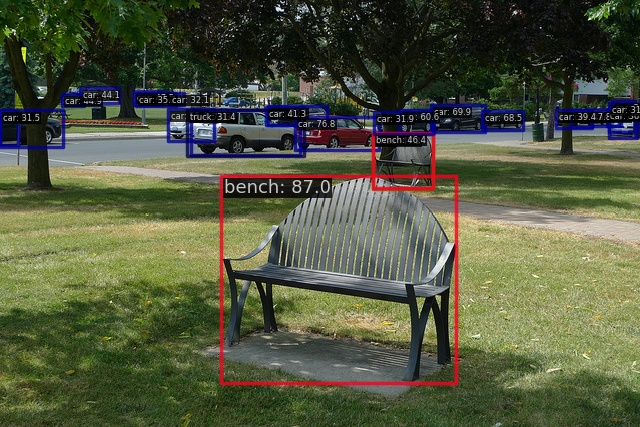

In [43]:
# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

In [47]:
#custom train,val,test dataloader -> config.py

###############################################################
###############################################################
#위에 쭉 따라왔을시 test folder를 /content/coco_style로 옮기기#
###############################################################
###############################################################

import shutil

src_dir = "/content/test"
dst_dir = "/content/coco_style"

shutil.move(src_dir, dst_dir)


config_car_detection = """
# Inherit and overwrite part of the config based on this config
_base_ = '/content/mmdetection/configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py'

data_root = '/content/coco_style/' # dataset root

train_batch_size_per_gpu = 8
train_num_workers = 2

max_epochs = 30
stage2_num_epochs = 1
base_lr = 0.00015

metainfo = {
    'classes' : (
        'chevrolet_malibu_sedan_2012_2016',
        'chevrolet_malibu_sedan_2017_2019',
        'chevrolet_spark_hatchback_2016_2021',
        'chevrolet_trailblazer_suv_2021_',
        'chevrolet_trax_suv_2017_2019',
        'genesis_g80_sedan_2016_2020',
        'genesis_g80_sedan_2021_',
        'genesis_gv80_suv_2020_',
        'hyundai_avante_sedan_2011_2015',
        'hyundai_avante_sedan_2020_',
        'hyundai_grandeur_sedan_2011_2016',
        'hyundai_grandstarex_van_2018_2020',
        'hyundai_ioniq_hatchback_2016_2019',
        'hyundai_sonata_sedan_2004_2009',
        'hyundai_sonata_sedan_2010_2014',
        'hyundai_sonata_sedan_2019_2020',
        'kia_carnival_van_2015_2020',
        'kia_carnival_van_2021_',
        'kia_k5_sedan_2010_2015',
        'kia_k5_sedan_2020_',
        'kia_k7_sedan_2016_2020',
        'kia_mohave_suv_2020_',
        'kia_morning_hatchback_2004_2010',
        'kia_morning_hatchback_2011_2016',
        'kia_ray_hatchback_2012_2017',
        'kia_sorrento_suv_2015_2019',
        'kia_sorrento_suv_2020_',
        'kia_soul_suv_2014_2018',
        'kia_sportage_suv_2016_2020',
        'kia_stonic_suv_2017_2019',
        'renault_sm3_sedan_2015_2018',
        'renault_xm3_suv_2020_',
        'ssangyong_korando_suv_2019_2020',
        'ssangyong_tivoli_suv_2016_2020',
    )
}

train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    dataset=dict(
        data_root=data_root,
        data_prefix=dict(img='train2017/'),
        ann_file='annotations/train.json',
        metainfo=metainfo
    )
)

val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        data_prefix=dict(img='val2017/'),
        ann_file='annotations/validation.json',
        metainfo=metainfo
    )
)

test_dataloader = dict(
    batch_size=1,
    num_workers=2,
    dataset=dict(
        test_mode=True,
        # explicitly add your class names to the field 'metainfo'
        metainfo=metainfo,
        data_root=data_root,
        data_prefix=dict(img='test/'),
        ann_file='annotations/test.json'
    )
)


# test_dataloader = val_dataloader

val_evaluator = dict(ann_file=data_root + 'annotations/validation.json')

# test_evaluator = val_evaluator

model = dict(bbox_head=dict(num_classes=35))

# learning rate
param_scheduler = [
    dict(
        type='LinearLR',
        start_factor=1.0e-5,
        by_epoch=False,
        begin=0,
        end=10),
    dict(
        # use cosine lr from 10 to 20 epoch
        type='CosineAnnealingLR',
        eta_min=base_lr * 0.05,
        begin=max_epochs // 2,
        end=max_epochs,
        T_max=max_epochs // 2,
        by_epoch=True,
        convert_to_iter_based=True),
]

train_pipeline_stage2 = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(640, 640),
        ratio_range=(0.1, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(640, 640)),
    dict(type='YOLOXHSVRandomAug'),
    dict(type='RandomFlip', prob=0.5),
    dict(type='Pad', size=(640, 640), pad_val=dict(img=(114, 114, 114))),
    dict(type='PackDetInputs')
]

# optimizer
optim_wrapper = dict(
    _delete_=True,
    type='OptimWrapper',
    optimizer=dict(type='AdamW', lr=base_lr, weight_decay=0.05),
    paramwise_cfg=dict(
        norm_decay_mult=0, bias_decay_mult=0, bypass_duplicate=True))

default_hooks = dict(
    checkpoint=dict(
        interval=5,
        max_keep_ckpts=2,  # only keep latest 2 checkpoints
        save_best='auto'
    ),
    logger=dict(type='LoggerHook', interval=5))

custom_hooks = [
    dict(
        type='PipelineSwitchHook',
        switch_epoch=max_epochs - stage2_num_epochs,
        switch_pipeline=train_pipeline_stage2)
]

# load COCO pre-trained weight
load_from = '/content/mmdetection/checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=max_epochs, val_interval=1)
visualizer = dict(vis_backends=[dict(type='LocalVisBackend'),dict(type='TensorboardVisBackend')])
"""

with open('/content/mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-30e_car_detection.py', 'w') as f:
    f.write(config_car_detection)

In [57]:
print(config_car_detection)


# Inherit and overwrite part of the config based on this config
_base_ = '/content/mmdetection/configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py'

data_root = '/content/coco_style/' # dataset root

train_batch_size_per_gpu = 8
train_num_workers = 2

max_epochs = 30
stage2_num_epochs = 1
base_lr = 0.00015

metainfo = {
    'classes' : (
        'chevrolet_malibu_sedan_2012_2016',
        'chevrolet_malibu_sedan_2017_2019',
        'chevrolet_spark_hatchback_2016_2021',
        'chevrolet_trailblazer_suv_2021_',
        'chevrolet_trax_suv_2017_2019',
        'genesis_g80_sedan_2016_2020',
        'genesis_g80_sedan_2021_',
        'genesis_gv80_suv_2020_',
        'hyundai_avante_sedan_2011_2015',
        'hyundai_avante_sedan_2020_',
        'hyundai_grandeur_sedan_2011_2016',
        'hyundai_grandstarex_van_2018_2020',
        'hyundai_ioniq_hatchback_2016_2019',
        'hyundai_sonata_sedan_2004_2009',
        'hyundai_sonata_sedan_2010_2014',
        'hyundai_sonata_sedan_2019_2020',

In [56]:
!mim install mmdet

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.9 MB/s eta 0:00:00


In [ ]:
#train
%cd /content/mmdetection
!python3 tools/train.py /content/mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-30e_car_detection.py

/content/mmdetection
11/10 06:35:26 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 578154117
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-ge

In [ ]:
# load tensorboard in colab
%load_ext tensorboard


# see curves in tensorboard
%tensorboard --logdir ./work_dirs

In [ ]:
#custom  (pretrained pth => checkpoint)  + (model => config)
from mmdet.apis import DetInferencer
import glob


# Choose to use a config
config = 'configs/rtmdet/rtmdet_tiny_1xb4-35e_car_detection.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('./work_dirs/rtmdet_tiny_1xb4-35e_car_detection/epoch_30.pth')[0]
# # Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

In [ ]:
# Use the detector to do inference
img = './data/car_detection/test/064507368.png'
result = inferencer(img, out_dir='./output', return_datasamples=True, no_save_pred=False, return_vis=True)

In [ ]:
# Show the output image
from PIL import Image
Image.open('./output/vis/064507368.png')

In [ ]:
from rich.pretty import pprint
pprint(result, max_length=4)

In [ ]:
result = inferencer('/home/kwy00/mmdetection/data/car_detection/test/', return_datasamples=False, no_save_pred=True, return_vis=False)

In [ ]:
from rich.pretty import pprint
pprint(result, max_length=4)

In [ ]:
result['predictions'][0]['labels'][4]

In [ ]:
import pandas as pd
import os

test_img = glob.glob('/home/kwy00/mmdetection/data/car_detection/test/*.png')

def inference(predict_size):
    result_csv = pd.read_csv('/home/kwy00/ysy/sample_submission.csv')

    for i in range(len(result['predictions'])):
        labels = list()
        scores = list()
        for key in ['labels', 'scores', 'bboxes']:
            arr = result['predictions'][i][key]
            if key == 'labels':
                for index in range(predict_size):
                    labels.append(arr[index])
            elif key == 'scores':
                for index in range(predict_size):
                    scores.append(arr[index])
            else:
                for index in range(predict_size):
                    x_min = arr[index][0]
                    y_min = arr[index][1]
                    x_max = arr[index][2]
                    y_max = arr[index][3]


                    index_list = list([1])
                    new_row = pd.DataFrame({"file_name": test_img[i].split('/')[-1],
                                        "class_id": labels[index],
                                        "confidence": scores[index],
                                        "point1_x":x_min, "point1_y":y_min,
                                        "point2_x":x_max, "point2_y":y_min,
                                        "point3_x":x_max, "point3_y":y_max,
                                        "point4_x":x_min, "point4_y":y_max},
                                        index=index_list)
                    result_csv = pd.concat([result_csv, new_row], ignore_index=True)


    resultpath = os.path.join('/home/kwy00/temporary_result', 'baseline_submit.csv')
    # 결과를 CSV 파일로 저장
    result_csv.to_csv(resultpath, index=False)

    print('Done.')


In [ ]:
inference(10)

In [ ]:
#1등과정 custom -> train 방법 만들예정~~~~~ model custom backbone , neck , head